In [117]:
# Question:
# What is the shortest distance to fly between all fifty States?

# I'll be using the dataset: 
# https://www.kaggle.com/datasets/flashgordon/usa-airport-dataset

# Here is some info about the attributes present in the dataset:

# Origin_airport: Three letter airport code of the origin airport
# Destination_airport: Three letter airport code of the destination airport
# Origin_city: Origin city name
# Destination_city: Destination city name
# Passengers: Number of passengers transported from origin to destination
# Seats: Number of seats available on flights from origin to destination
# Flights: Number of flights between origin and destination (multiple records for one month, many with flights > 1)
# Distance: Distance (to nearest mile) flown between origin and destination
# Fly_date: The date (yyyymm) of flight
# Origin_population: Origin city's population as reported by US Census
# Destination_population: Destination city's population as reported by US Census

In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

import networkx as nx


In [119]:
def GetCoords(city):
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(city  + ", US")
    return location.latitude, location.longitude


In [9]:
# Let's get the 
def GenerateData():
        
    dfFlights = pd.read_csv("G:\\My Drive\\Data\\DataStumbler\\Datasets\\Airports2.csv")

    # Just to make it easier let's just keep what we need

    dfFlights = dfFlights[['Origin_city','Destination_city','Distance']].copy()

    # Drop duplicates

    dfFlights = dfFlights.drop_duplicates()

    dfFlights = dfFlights.query("Destination_state!='District of Columbia'")

    # Now we'll change the city to just have the State instead.

    dfFlights["Origin_state"]=''
    dfFlights["Destination_state"]=''

    stateLookup = [ ['Alabama','AL'], ['Alaska','AK'], ['Arizona','AZ'], ['Arkansas','AR'], ['California','CA'], ['Colorado','CO'], ['Connecticut','CT'], ['Delaware','DE'], ['District of Columbia','DC'], ['Florida','FL'], ['Georgia','GA'], ['Hawaii','HI'], ['Idaho','ID'], ['Illinois','IL'], ['Indiana','IN'], ['Iowa','IA'], ['Kansas','KS'], ['Kentucky','KY'], ['Louisiana','LA'], ['Maine','ME'], ['Maryland','MD'], ['Massachusetts','MA'], ['Michigan','MI'], ['Minnesota','MN'], ['Mississippi','MS'], ['Missouri','MO'], ['Montana','MT'], ['Nebraska','NE'], ['Nevada','NV'], ['New Hampshire','NH'], ['New Jersey','NJ'], ['New Mexico','NM'], ['New York','NY'], ['North Carolina','NC'], ['North Dakota','ND'], ['Ohio','OH'], ['Oklahoma','OK'], ['Oregon','OR'], ['Pennsylvania','PA'], ['Rhode Island','RI'], ['South Carolina','SC'], ['South Dakota','SD'], ['Tennessee','TN'], ['Texas','TX'], ['Utah','UT'], ['Vermont','VT'], ['Virginia','VA'], ['Washington','WA'], ['West Virginia','WV'], ['Wisconsin','WI'], ['Wyoming','WY'] ]

    for state in stateLookup:
        dfFlights.loc[dfFlights['Origin_city'].str.contains(', ' + state[1]), 'Origin_state'] = state[0]
        dfFlights.loc[dfFlights['Destination_city'].str.contains(', ' + state[1]), 'Destination_state'] = state[0]


    # And we'll add the Lat/Long in case we want to plot things, or need it for some other reason

    dfFlights["Lat"]=''
    dfFlights["Long"]=''

    for city in set(dfFlights.Origin_city.to_list()):
        lat, long = GetCoords(city)
        print(city)
        dfFlights.loc[dfFlights['Origin_city'].str.contains(city), 'Lat'] = lat
        dfFlights.loc[dfFlights['Origin_city'].str.contains(city), 'Long'] = long

    # Save it so we can just load the small version in
    dfFlights.to_pickle("flightData.pkl")


In [11]:
# Read our cleaned data

GenerateData()

# Read our new version in
dfFlights = pd.read_pickle("flightData.pkl")

dfFlights.head(10)

set(dfFlights.Destination_state.tolist())

UndefinedVariableError: name 'destination_state' is not defined

In [ ]:
def GetCoords(city):
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(city  + ", US")


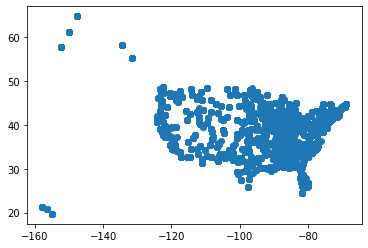

In [135]:
# Add co-ordinates so we can plot the path on a map
   
plt.scatter(x=dfFlights['Long'], y=dfFlights['Lat'])
plt.show()


In [136]:
# Pick a random starting airport

def LookForRandomPath():

    r = random.randrange(0,len(dfFlights)-1)

    currentCity = (dfFlights.iloc[r])

    statesVisited = []
    citiesVisited = []
    totalDistance = 0

    while len(statesVisited)!=50:

        dfPossibleCities = dfFlights[~dfFlights['Destination_state'].isin(statesVisited)]
        dfPossibleCities = dfPossibleCities.query("Origin_city==@currentCity.Origin_city and Distance!=0")
        
        if (len(dfPossibleCities))==0:
            return -1,[],[]
            
        r2 = random.randrange(0,4)
        if len(dfPossibleCities)-1<r2:
            r2 = 0

        nextCity = dfPossibleCities.sort_values("Distance").iloc[r2].Destination_city
        nextState = dfPossibleCities.sort_values("Distance").iloc[r2].Destination_state
        totalDistance += dfPossibleCities.sort_values("Distance").iloc[r2].Distance

        citiesVisited.append(nextCity)
        statesVisited.append(nextState)
    
    return totalDistance, statesVisited, citiesVisited

1 50613 ['Texas', 'Louisiana', 'Mississippi', 'Arkansas', 'Oklahoma', 'Missouri', 'Tennessee', 'Florida', 'Alabama', 'New Mexico', 'Kansas', 'Georgia', 'Illinois', 'Colorado', 'Nebraska', 'Iowa', 'South Carolina', 'Kentucky', 'Indiana', 'Ohio', 'North Carolina', 'Arizona', 'Wyoming', 'South Dakota', 'Minnesota', 'Wisconsin', 'West Virginia', 'Michigan', 'Virginia', 'Pennsylvania', 'Utah', 'District of Columbia', 'Nevada', 'North Dakota', 'New York', 'Maryland', 'California', 'Montana', 'Delaware', 'New Jersey', 'Idaho', 'Connecticut', 'Rhode Island', 'Vermont', 'Massachusetts', 'Maine', 'Washington', 'Oregon', 'New Hampshire', 'Alaska']


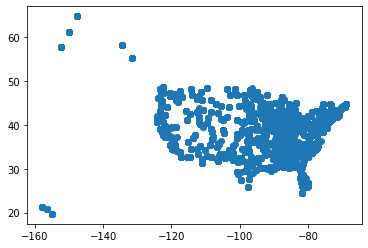

2 49086 ['New York', 'New Jersey', 'Connecticut', 'Pennsylvania', 'Rhode Island', 'Massachusetts', 'Maryland', 'Delaware', 'District of Columbia', 'New Hampshire', 'Vermont', 'Maine', 'Virginia', 'Ohio', 'West Virginia', 'North Carolina', 'Michigan', 'Indiana', 'Kentucky', 'South Carolina', 'Georgia', 'Illinois', 'Wisconsin', 'Tennessee', 'Florida', 'Missouri', 'Alabama', 'Minnesota', 'Mississippi', 'Iowa', 'Arkansas', 'Louisiana', 'South Dakota', 'Nebraska', 'North Dakota', 'Kansas', 'Oklahoma', 'Texas', 'Colorado', 'New Mexico', 'Wyoming', 'Montana', 'Utah', 'Arizona', 'Washington', 'Nevada', 'Idaho', 'California', 'Oregon', 'Alaska']


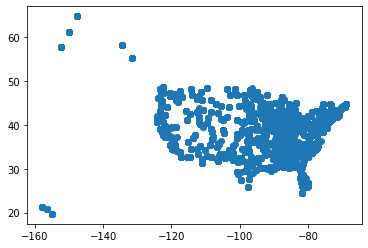

5 41232 ['Illinois', 'Michigan', 'Indiana', 'Wisconsin', 'Ohio', 'Iowa', 'Minnesota', 'Missouri', 'Pennsylvania', 'Kentucky', 'Nebraska', 'South Dakota', 'New York', 'West Virginia', 'Tennessee', 'Kansas', 'North Dakota', 'Virginia', 'Arkansas', 'North Carolina', 'District of Columbia', 'Maryland', 'South Carolina', 'Alabama', 'Mississippi', 'Oklahoma', 'Georgia', 'New Jersey', 'Delaware', 'Louisiana', 'Connecticut', 'Texas', 'Massachusetts', 'Wyoming', 'New Hampshire', 'Florida', 'Colorado', 'Maine', 'New Mexico', 'Montana', 'Vermont', 'Utah', 'Arizona', 'Idaho', 'Washington', 'Nevada', 'Oregon', 'California', 'Alaska', 'Hawaii']


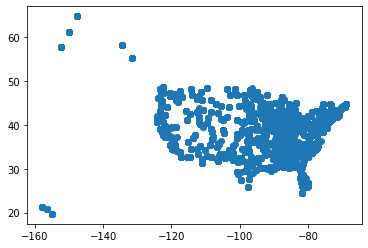

8 40948 ['Michigan', 'Ohio', 'Indiana', 'Pennsylvania', 'Illinois', 'Wisconsin', 'New York', 'West Virginia', 'Kentucky', 'Iowa', 'District of Columbia', 'Maryland', 'Virginia', 'Tennessee', 'Delaware', 'Missouri', 'North Carolina', 'New Jersey', 'South Carolina', 'Minnesota', 'Connecticut', 'Georgia', 'Arkansas', 'Vermont', 'Alabama', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Nebraska', 'Mississippi', 'Kansas', 'Maine', 'North Dakota', 'South Dakota', 'Oklahoma', 'Florida', 'Louisiana', 'Texas', 'Wyoming', 'Colorado', 'Montana', 'New Mexico', 'Utah', 'Arizona', 'Washington', 'Nevada', 'California', 'Oregon', 'Alaska', 'Hawaii']


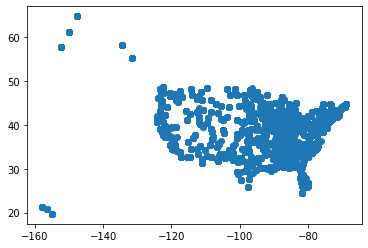

10 37359 ['Missouri', 'Illinois', 'Indiana', 'Iowa', 'Kentucky', 'Tennessee', 'Arkansas', 'Ohio', 'Wisconsin', 'Oklahoma', 'Alabama', 'Michigan', 'Kansas', 'Nebraska', 'Minnesota', 'Mississippi', 'Louisiana', 'Georgia', 'North Carolina', 'West Virginia', 'South Dakota', 'Texas', 'Pennsylvania', 'South Carolina', 'Virginia', 'Florida', 'North Dakota', 'New York', 'District of Columbia', 'Colorado', 'Maryland', 'New Jersey', 'Wyoming', 'New Mexico', 'Vermont', 'Connecticut', 'Delaware', 'Massachusetts', 'Rhode Island', 'New Hampshire', 'Utah', 'Idaho', 'Maine', 'Montana', 'Arizona', 'Washington', 'California', 'Nevada', 'Oregon', 'Hawaii']


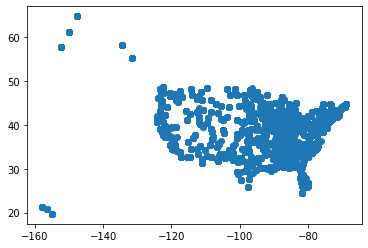

19 37227 ['Illinois', 'Missouri', 'Iowa', 'Indiana', 'Kentucky', 'Arkansas', 'Tennessee', 'Ohio', 'Wisconsin', 'Oklahoma', 'Nebraska', 'Kansas', 'Alabama', 'Michigan', 'Mississippi', 'Minnesota', 'Louisiana', 'South Dakota', 'North Carolina', 'Georgia', 'South Carolina', 'Texas', 'Pennsylvania', 'West Virginia', 'Virginia', 'Florida', 'New York', 'North Dakota', 'District of Columbia', 'Maryland', 'Colorado', 'New Jersey', 'New Mexico', 'Wyoming', 'Delaware', 'Rhode Island', 'Vermont', 'Massachusetts', 'Connecticut', 'Utah', 'New Hampshire', 'Maine', 'Idaho', 'Arizona', 'Montana', 'Nevada', 'Washington', 'California', 'Hawaii', 'Oregon']


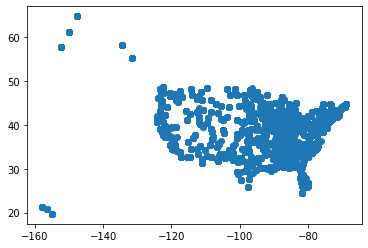

70 36498 ['Illinois', 'Indiana', 'Wisconsin', 'Michigan', 'Iowa', 'Ohio', 'Missouri', 'Minnesota', 'Kentucky', 'Pennsylvania', 'Nebraska', 'Tennessee', 'West Virginia', 'New York', 'South Dakota', 'Kansas', 'Arkansas', 'Alabama', 'Virginia', 'Mississippi', 'North Carolina', 'South Carolina', 'North Dakota', 'Georgia', 'Oklahoma', 'District of Columbia', 'Maryland', 'Delaware', 'Louisiana', 'New Jersey', 'Connecticut', 'Vermont', 'Texas', 'Florida', 'New Hampshire', 'Rhode Island', 'Massachusetts', 'Wyoming', 'Maine', 'Colorado', 'Montana', 'New Mexico', 'Utah', 'Idaho', 'Arizona', 'Nevada', 'Washington', 'California', 'Oregon', 'Alaska']


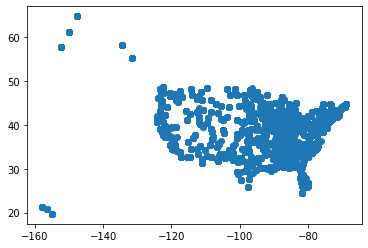

79 35931 ['Illinois', 'Indiana', 'Wisconsin', 'Michigan', 'Iowa', 'Ohio', 'Missouri', 'Kentucky', 'Minnesota', 'Tennessee', 'Pennsylvania', 'West Virginia', 'Nebraska', 'South Dakota', 'New York', 'Kansas', 'Georgia', 'North Carolina', 'Alabama', 'Arkansas', 'Mississippi', 'South Carolina', 'North Dakota', 'Oklahoma', 'Virginia', 'District of Columbia', 'Maryland', 'Delaware', 'New Jersey', 'Louisiana', 'Vermont', 'Connecticut', 'Texas', 'Florida', 'New Hampshire', 'Rhode Island', 'Colorado', 'Massachusetts', 'Wyoming', 'Maine', 'Montana', 'New Mexico', 'Utah', 'Idaho', 'Arizona', 'Nevada', 'Washington', 'Oregon', 'California', 'Alaska']


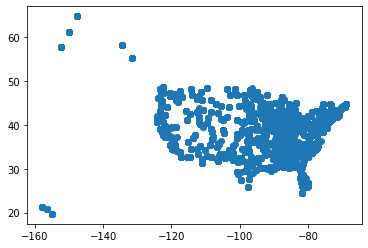

410 35911 ['Illinois', 'Indiana', 'Wisconsin', 'Michigan', 'Iowa', 'Ohio', 'Missouri', 'Minnesota', 'Kentucky', 'Pennsylvania', 'Tennessee', 'Nebraska', 'West Virginia', 'Kansas', 'New York', 'South Dakota', 'Georgia', 'North Carolina', 'Arkansas', 'Alabama', 'Virginia', 'Oklahoma', 'Mississippi', 'South Carolina', 'District of Columbia', 'North Dakota', 'Maryland', 'Delaware', 'New Jersey', 'Louisiana', 'Connecticut', 'Vermont', 'Texas', 'Florida', 'New Hampshire', 'Rhode Island', 'Massachusetts', 'Colorado', 'Wyoming', 'Maine', 'New Mexico', 'Montana', 'Idaho', 'Utah', 'Arizona', 'Nevada', 'Washington', 'California', 'Oregon', 'Alaska']


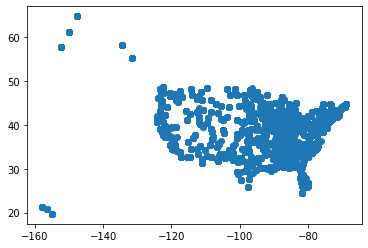

474 35818 ['Ohio', 'Indiana', 'Illinois', 'Kentucky', 'Michigan', 'Missouri', 'West Virginia', 'Tennessee', 'Wisconsin', 'Pennsylvania', 'Alabama', 'Iowa', 'North Carolina', 'Arkansas', 'South Carolina', 'Georgia', 'Virginia', 'Minnesota', 'District of Columbia', 'Mississippi', 'Maryland', 'New York', 'Nebraska', 'Kansas', 'Louisiana', 'Oklahoma', 'Florida', 'South Dakota', 'Texas', 'New Jersey', 'Delaware', 'North Dakota', 'Massachusetts', 'Rhode Island', 'Connecticut', 'Maine', 'Colorado', 'Wyoming', 'Vermont', 'New Mexico', 'Montana', 'Utah', 'Idaho', 'Arizona', 'Nevada', 'New Hampshire', 'Washington', 'California', 'Oregon', 'Alaska']


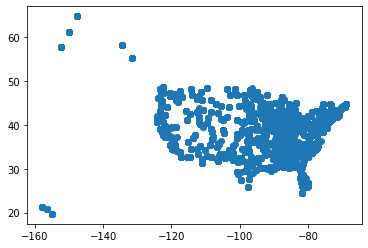

Tries: 500


KeyboardInterrupt: 

In [137]:

best = 100000000
tries = 0
while True==True:

     totalDistance, statesVisited, citiesVisited = LookForRandomPath()
     
     tries = tries + 1
     if tries%500==0:
          print("Tries:",tries)

     if totalDistance < best and totalDistance!=-1:
          print(tries, totalDistance, statesVisited)
          best = totalDistance
          
          plt.scatter(x=dfFlights['Long'], y=dfFlights['Lat'])
          plt.show()


In [1]:
dfFlights.head(10)

NameError: name 'dfFlights' is not defined